17379 Rows and 16 Columns
dteday 0
season 0
yr 0
mnth 0
hr 0
holiday 0
weekday 0
workingday 0
weathersit 0
temp 0
atemp 0
hum 0
windspeed 0
casual 0
registered 0
cnt 0
mnth
1        4.466570
2        9.617874
3       17.569863
4       31.079277
5       41.733871
6       42.516667
7       48.994624
8       39.455540
9       37.022315
10      33.946164
11      21.688456
12      11.400810
Name: 2011 Month Mean, dtype: float64
mnth
1       12.103914
2       12.602601
3       42.554509
4       53.559889
5       59.455645
6       60.130556
7       56.055108
8       58.060484
9       60.802778
10      48.782486
11      29.260446
12      17.850404
Name: 2012 Month Mean, dtype: float64
mnth
1        8.426872
2       11.158091
3       30.172437
4       42.311761
5       50.594758
6       51.323611
7       52.524866
8       48.840000
9       48.937370
10      41.185389
11      25.471816
12      14.627782
Name: Casual Month Mean, dtype: float64
mnth
1        85.997901
2       101.706935
3       12

array([[<matplotlib.axes.AxesSubplot object at 0x106ea4c10>,
        <matplotlib.axes.AxesSubplot object at 0x108df1ed0>]], dtype=object)

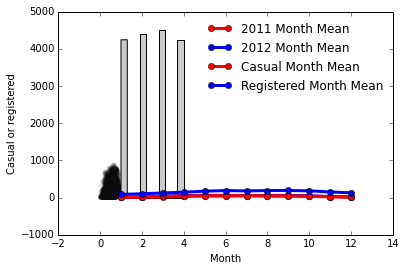

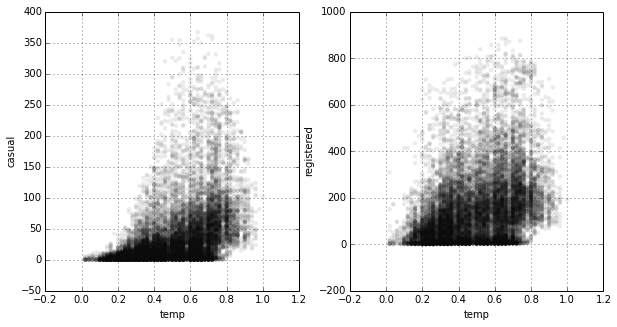

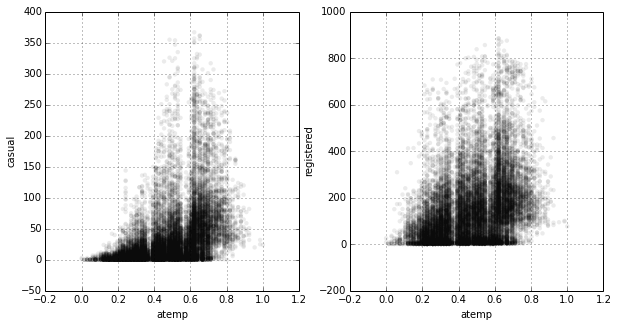

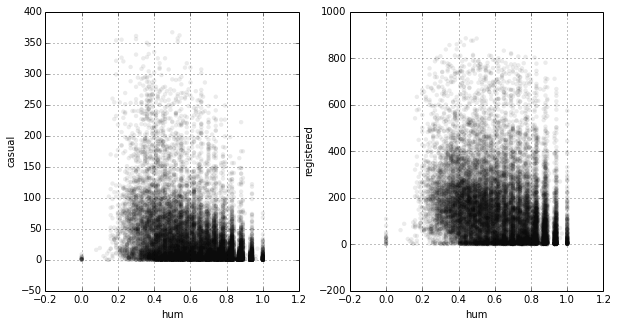

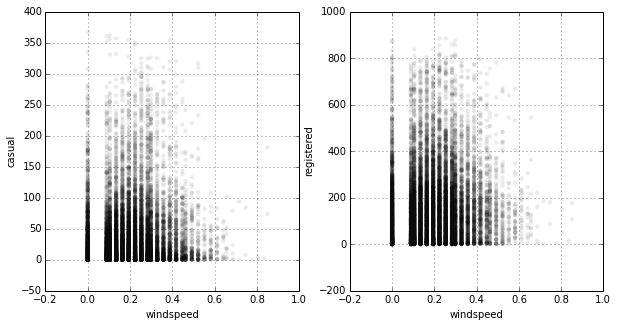

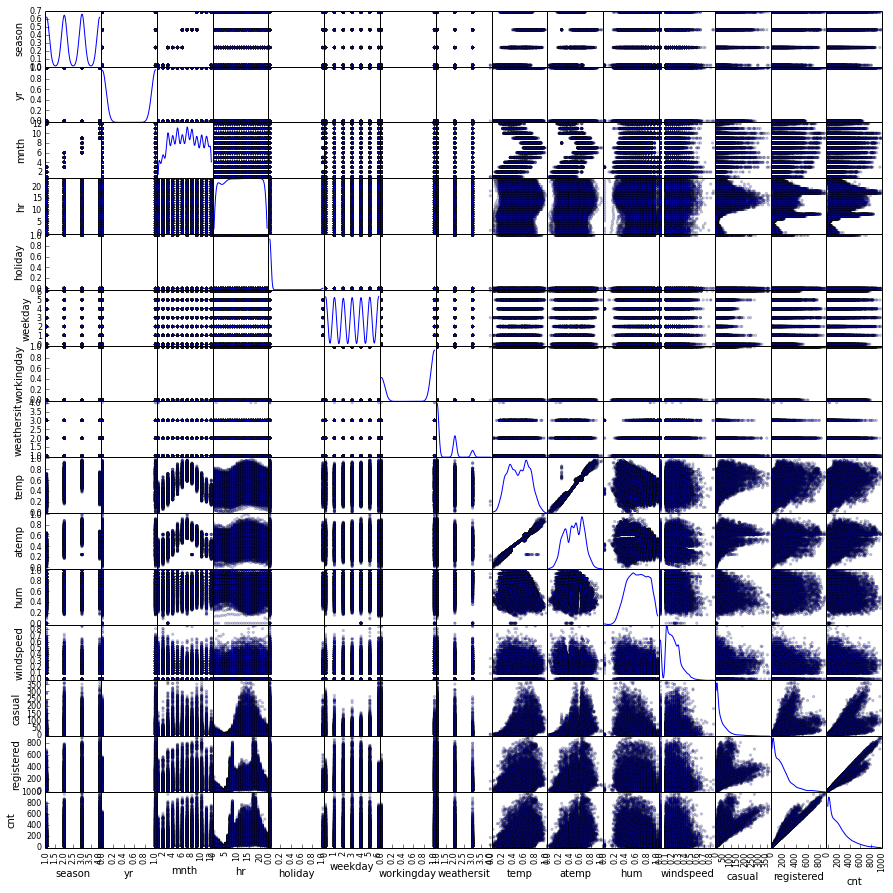

In [1]:
### Goals:
  * Explore the data in both hourly and daily counts. You'll need to aggregate by day to generate the daily data.
  * Visualise the relationships between the ridership and different features.
  * Explain which features seem to be the strongest indicators for each type of ridership (casual and noncasual). Do certain features come off as better tells for one over the other?
  * Summarise your results.
  * **Extra**: Business application. Given this information, what suggestions could be made to improve the ridership program? Consider this open field, since we only have aggregated stats and not individual ridership here.

## What's due:
* **For part I:** Python scripts with comments and image files for plots 
* **For part II:** A notebook that goes through the data exploration model
    * acquires and imports the data
    * cleans it up (create the daily from the hourly)
    * explores the two data sets for patterns
    * summarises and explains the results
    * Please upload this notebook to your github (the `.ipynb` file), or copy and paste the file's contents into a gist.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)

In [2]:
# Acquires and imports the data
bike=pd.read_csv('bikeshare.csv',header=0)
bike=bike.drop('instant',axis=1)
print "%i Rows and %i Columns" %bike.shape
bike.head()
bike.describe()


for r in bike.columns:
    print r,sum(bike[r].isnull())

17379 Rows and 16 Columns
dteday 0
season 0
yr 0
mnth 0
hr 0
holiday 0
weekday 0
workingday 0
weathersit 0
temp 0
atemp 0
hum 0
windspeed 0
casual 0
registered 0
cnt 0


array([[<matplotlib.axes.AxesSubplot object at 0x112b35890>,
        <matplotlib.axes.AxesSubplot object at 0x112bccb10>]], dtype=object)

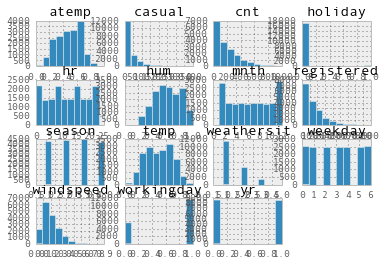

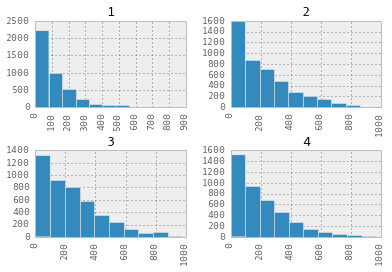

In [7]:
#plt.hist(bike.season,color='#cccccc')

#plt.scatter(bike.temp, bike.registered, lw=0, alpha=.08, color='k')
bike.hist()
bike.cnt.hist(by=bike.season)

array([[<matplotlib.axes.AxesSubplot object at 0x10c4f11d0>,
        <matplotlib.axes.AxesSubplot object at 0x10e8ec090>]], dtype=object)

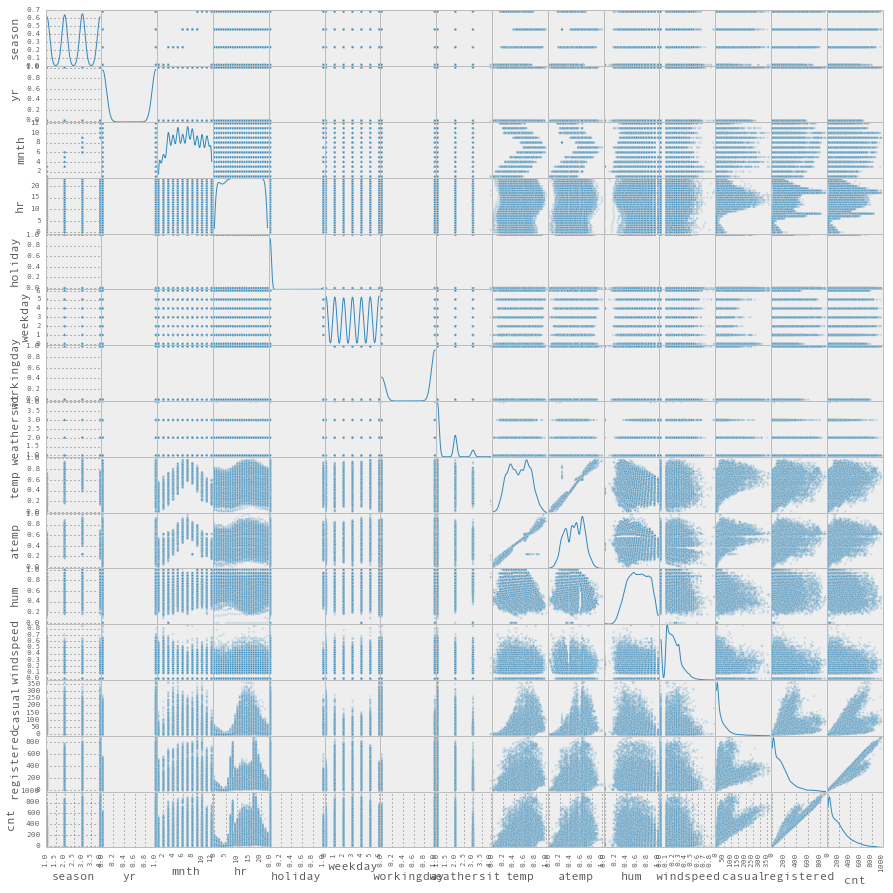

In [3]:
# create scatter matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
#df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(bike, alpha=0.2,figsize=(15, 15), diagonal='kde')

mnth
1        55.507267
2        74.291217
3        87.732877
4       131.947149
5       182.555108
6       199.322222
7       189.974462
8       186.991792
9       177.709902
10      166.232840
11      142.095967
12      117.844804
Name: 2011 Month Mean, dtype: float64
mnth
1       130.558704
2       149.041908
3       221.904441
4       242.651811
5       263.259409
6       281.708333
7       273.665323
8       288.310484
9       303.573611
10      280.848870
11      212.623955
12      166.729111
Name: 2012 Month Mean, dtype: float64


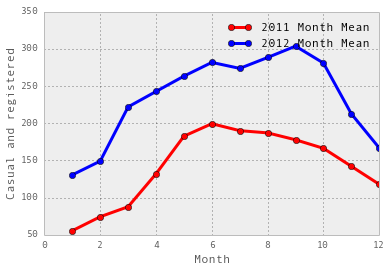

In [8]:
# Compare different year's rentals
bike2011monthmean=bike[bike['yr']==0].groupby('mnth').cnt.mean()
bike2011monthmean.name='2011 Month Mean'
bike2012monthmean=bike[bike['yr']==1].groupby('mnth').cnt.mean()
bike2012monthmean.name='2012 Month Mean'
print bike2011monthmean
print bike2012monthmean

plt.plot(bike2011monthmean.index,bike2011monthmean.values,'o-',color='r', lw=3, label='2011 Month Mean')
plt.plot(bike2011monthmean.index,bike2012monthmean.values,'o-',color='b', lw=3, label='2012 Month Mean')
plt.title="Monthl average bikes 2011 vs 2012"
plt.xlabel("Month")
plt.ylabel("Casual and registered")
plt.legend(frameon=False)

mnth
1        8.426872
2       11.158091
3       30.172437
4       42.311761
5       50.594758
6       51.323611
7       52.524866
8       48.840000
9       48.937370
10      41.185389
11      25.471816
12      14.627782
Name: Casual Month Mean, dtype: float64
mnth
1        85.997901
2       101.706935
3       125.238289
4       144.949200
5       172.312500
6       189.191667
7       179.295027
8       189.257627
9       191.835769
10      180.973122
11      151.863605
12      127.675657
Name: Registered Month Mean, dtype: float64


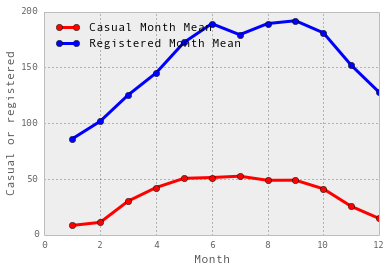

In [10]:
# Compare casual and registered users
bikecasmonthmean=bike.groupby('mnth').casual.mean()
bikecasmonthmean.name='Casual Month Mean'
bikeregmonthmean=bike.groupby('mnth').registered.mean()
bikeregmonthmean.name='Registered Month Mean'
print bikecasmonthmean
print bikeregmonthmean

plt.plot(bikecasmonthmean.index,bikecasmonthmean.values,'o-',color='r', lw=3, label='Casual Month Mean')
plt.plot(bikeregmonthmean.index,bikeregmonthmean.values,'o-',color='b', lw=3, label='Registered Month Mean')
plt.xlabel("Month")
plt.ylabel("Casual or registered")
plt.legend(frameon=False,loc="upper left")

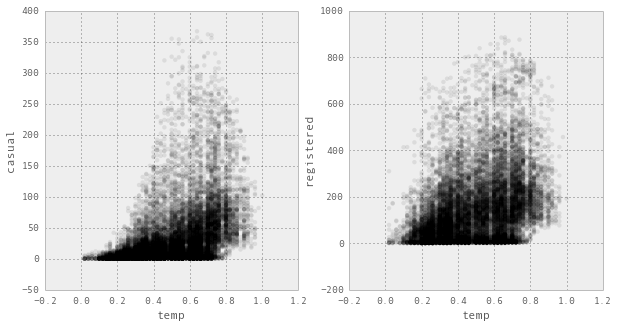

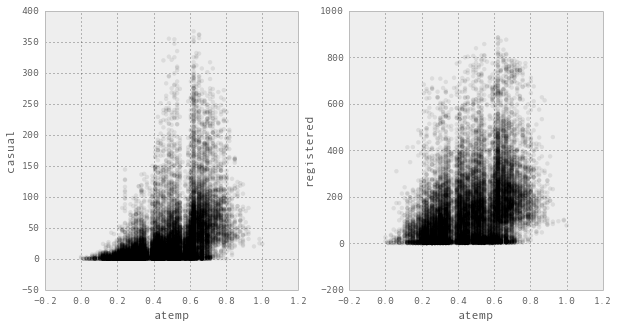

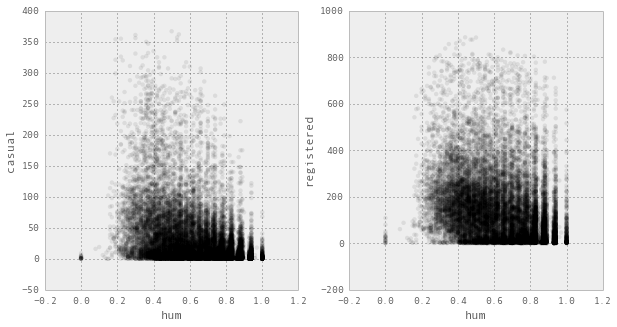

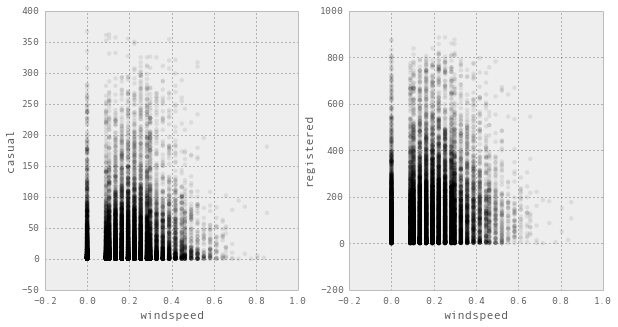

In [3]:
# finding correlation
fig, axs = plt.subplots(1, 2)
bike.plot(kind='scatter', x='temp', y='casual',lw=0,alpha=.08,color='k',ax=axs[0],figsize=(10, 5))
bike.plot(kind='scatter', x='temp', y='registered', lw=0,alpha=.08,color='k', ax=axs[1],figsize=(10, 5))

fig, axs = plt.subplots(1, 2)
bike.plot(kind='scatter', x='atemp', y='casual',lw=0,alpha=.08,color='k',ax=axs[0],figsize=(10, 5))
bike.plot(kind='scatter', x='atemp', y='registered', lw=0,alpha=.08,color='k', ax=axs[1],figsize=(10, 5))

fig, axs = plt.subplots(1, 2)
bike.plot(kind='scatter', x='hum', y='casual',lw=0,alpha=.08,color='k',ax=axs[0],figsize=(10, 5))
bike.plot(kind='scatter', x='hum', y='registered', lw=0,alpha=.08,color='k', ax=axs[1],figsize=(10, 5))

fig, axs = plt.subplots(1, 2)
bike.plot(kind='scatter', x='windspeed', y='casual',lw=0,alpha=.08,color='k',ax=axs[0],figsize=(10, 5))
bike.plot(kind='scatter', x='windspeed', y='registered', lw=0,alpha=.08,color='k', ax=axs[1],figsize=(10, 5))
